# Extremum Seeking Control
Extremum seeking control is a method for finding an optimal operating point for a system in real-time and without a model. It operates by injecting a high frequency zero mean signal into the system which is used to estimate the "gradient" of the system and update the operating point.

Two references on extremum seeking are [_Extremum Seeking Control_ by Miroslav Krstic](https://www.dropbox.com/h?preview=Krstic_ExtremumSeekingControl_2014.pdf), and [_Real-Time Optimization by Extremum-Seeking Control_ by Kartik B. Ariyur and Miroslav Krstic](https://www.dropbox.com/h?preview=Ariyur_ExtremumSeekingControl_2003.pdf).

## Static System Example
Both of the above references begin by introducing the following example.

![Flow Diagram](figs/extremum_seeking_control_static_system.png)
 

Text(0.5, 0, 't')

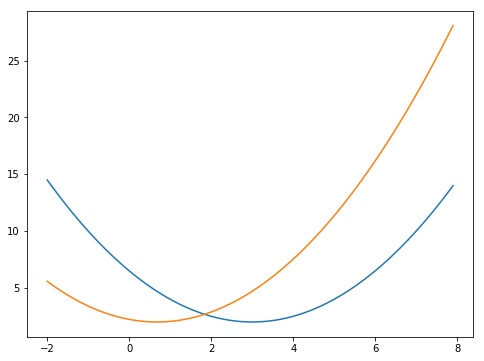

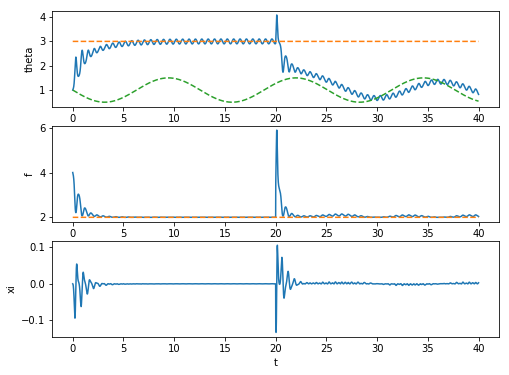

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('figure', figsize=(8,6))

f_star = 2.0
f_dd = 1.0
theta_star1 = 3.0
theta_star2 = 1.0

def f(theta, t):
    if t < 20:
        return f_star + .5*f_dd*(theta - theta_star1)**2
    else:
        return f_star + .5*f_dd*(theta - theta_star2 + .5*np.sin(.5*t))**2

a = .1
w = 10.

t_start = 0
t_end = 40
t_step = .001
t_vec = np.arange(t_start, t_end, t_step)
n = len(t_vec)

w_hp = w/4.
alpha_hp = 1./(w_hp*t_step + 1)

theta_hat = 1.0
k = -100.
xi_prev = 0.0
f_i_filtered = 0.0
f_i_prev = f(theta_hat, 0)

theta_history = np.zeros(n)
f_history = np.zeros(n)
xi_history = np.zeros(n)

for i in range(n):
    t = t_vec[i]
    theta_i = theta_hat + a*np.sin(w*t)
    f_i = f(theta_i, t) #- f_star - .5*f_dd*(theta_hat - theta_star)**2
    
    # High Pass Filter
    f_i_filtered = alpha_hp * f_i_filtered + alpha_hp * (f_i - f_i_prev)
    
    # Modulate
    xi = f_i_filtered * a * np.sin(w*t)
    
    # integrator
    theta_hat = k * (theta_hat/k + .5*t_step*(xi + xi_prev))
    
    theta_history[i] = theta_i
    f_history[i] = f_i
    xi_history[i] = xi
    xi_prev = xi
    f_i_prev = f_i
    

fig, ax = plt.subplots(1,1)
theta_vec = np.arange(-2,8,.1)
ax.plot(theta_vec, f(theta_vec, 0.))
ax.plot(theta_vec, f(theta_vec, 30.))
    
fig, ax = plt.subplots(3,1)
ax[0].plot(t_vec, theta_history)
ax[0].plot(t_vec, theta_star1*np.ones(n), '--')
ax[0].plot(t_vec, theta_star2 - .5*np.sin(.5*t_vec), '--')
ax[0].set_ylabel("theta")

ax[1].plot(t_vec, f_history)
ax[1].plot(t_vec, f_star*np.ones(n), '--')
ax[1].set_ylabel("f")
ax[1].set_xlabel("t")

ax[2].plot(t_vec, xi_history)
ax[2].set_ylabel("xi")
ax[2].set_xlabel("t")


The plots above show the controller finding and following the extremum of the function.

One of the keys I learned while doing this is the high pass filter is absolutely necessary. 